In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd

def convert_from_dd(x, size):
    temp = np.zeros(size)
    temp[x.index] = x.values
    return temp


## With original parameters

Here we make AA-GoC connections with an original parameter _diameter_= 15 um.

In [2]:
output_path = Path('/Users/shhong/Dropbox/network_data/output_ines')

srcs = np.load(output_path / 'AAtoGoCsources.npy')
tgts = np.load(output_path / 'AAtoGoCtargets.npy')
grcxy = np.loadtxt(output_path / 'GCcoordinates.sorted.dat')
gocxy = np.loadtxt(output_path / 'GoCcoordinates.sorted.dat')

df = dd.from_array(np.vstack((srcs, tgts)).T, columns=('src', 'tgt'))

In [3]:
cons_per_goc = df.groupby('tgt').count().compute()
cons_per_aa = df.groupby('src').count().compute()

cons_per_goc = convert_from_dd(cons_per_goc.src, gocxy.shape[0])
cons_per_aa = convert_from_dd(cons_per_aa.tgt, grcxy.shape[0])

[Text(0,0.5,'z (um)'), Text(0.5,0,'x (um)')]

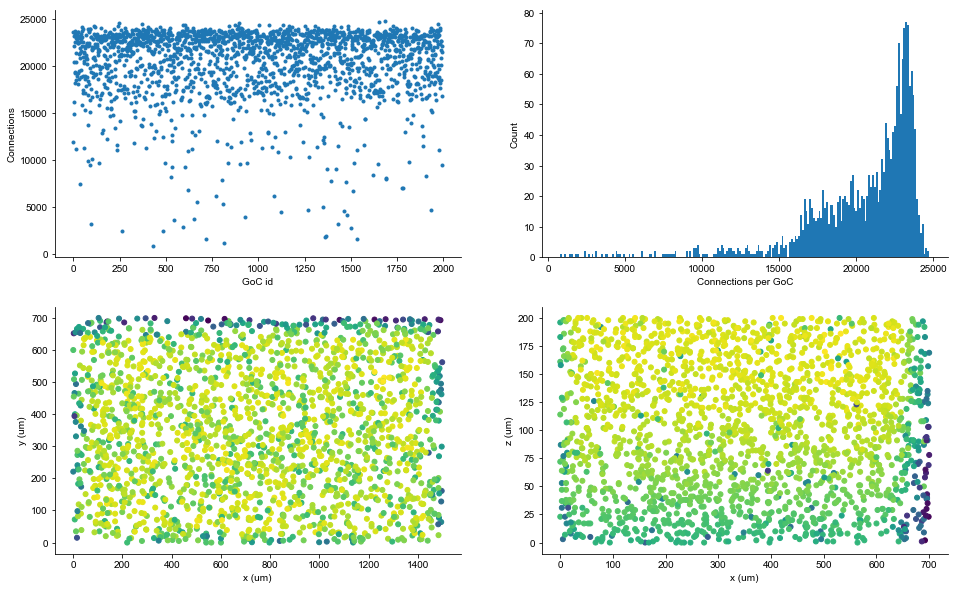

In [4]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))
ax[0,0].plot(cons_per_goc, '.')
ax[0,0].set(xlabel="GoC id", ylabel='Connections')
_ = ax[0,1].hist(cons_per_goc, 200)
ax[0,1].set(xlabel="Connections per GoC", ylabel='Count')
ax[1,0].scatter(gocxy[:,0], gocxy[:,1], 100, cons_per_goc, '.')
ax[1,0].set(xlabel="x (um)", ylabel="y (um)")
ax[1,1].scatter(gocxy[:,1], gocxy[:,2], 100, cons_per_goc, '.')
ax[1,1].set(xlabel="x (um)", ylabel="z (um)")


[Text(0,0.5,'z (um)'), Text(0.5,0,'x (um)')]

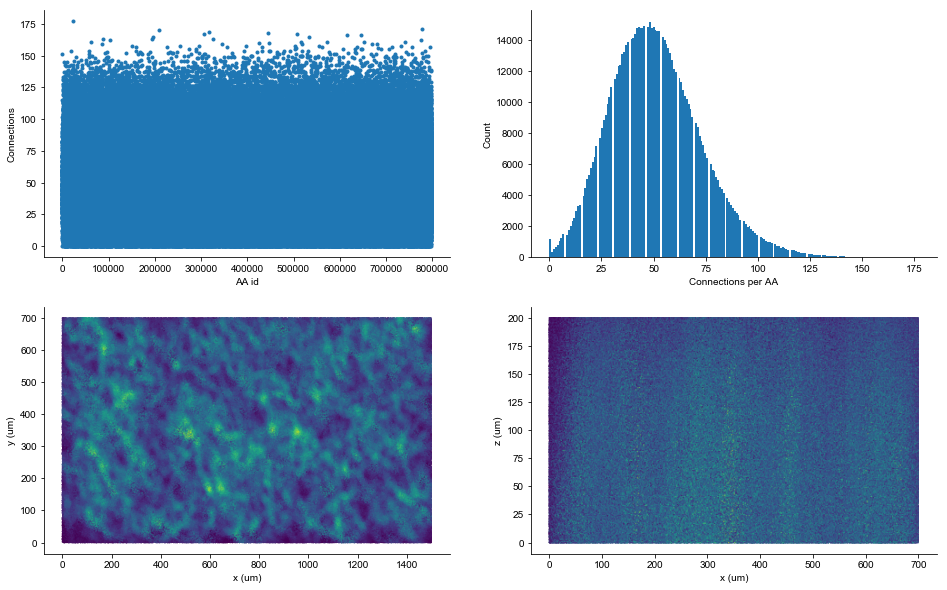

In [5]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))
ax[0,0].plot(cons_per_aa, '.')
ax[0,0].set(xlabel="AA id", ylabel='Connections')
ax[0,1].set(xlabel="Connections per AA", ylabel='Count')
_ = ax[0,1].hist(cons_per_aa, 200)
ax[1,0].scatter(grcxy[:,0], grcxy[:,1], 0.25, cons_per_aa, '.')
ax[1,0].set(xlabel="x (um)", ylabel="y (um)")
ax[1,1].scatter(grcxy[:,1], grcxy[:,2], 0.25, cons_per_aa, '.')
ax[1,1].set(xlabel="x (um)", ylabel="z (um)")

## BREP outputs

In [6]:
output_path = Path('/Users/shhong/Dropbox/network_data/output_brep')

srcs = np.load(output_path / 'AAtoGoCsources.npy')
tgts = np.load(output_path / 'AAtoGoCtargets.npy')

grcxy = np.loadtxt(output_path / 'GCcoordinates.sorted.dat')
gocxy = np.loadtxt(output_path / 'GoCcoordinates.sorted.dat')

df = dd.from_array(np.vstack((srcs, tgts)).T, columns=('src', 'tgt'))


cons_per_goc = df.groupby('tgt').count().compute()
cons_per_aa = df.groupby('src').count().compute()

cons_per_goc = convert_from_dd(cons_per_goc.src, gocxy.shape[0])
cons_per_aa = convert_from_dd(cons_per_aa.tgt, grcxy.shape[0])

[Text(0,0.5,'z (um)'), Text(0.5,0,'x (um)')]

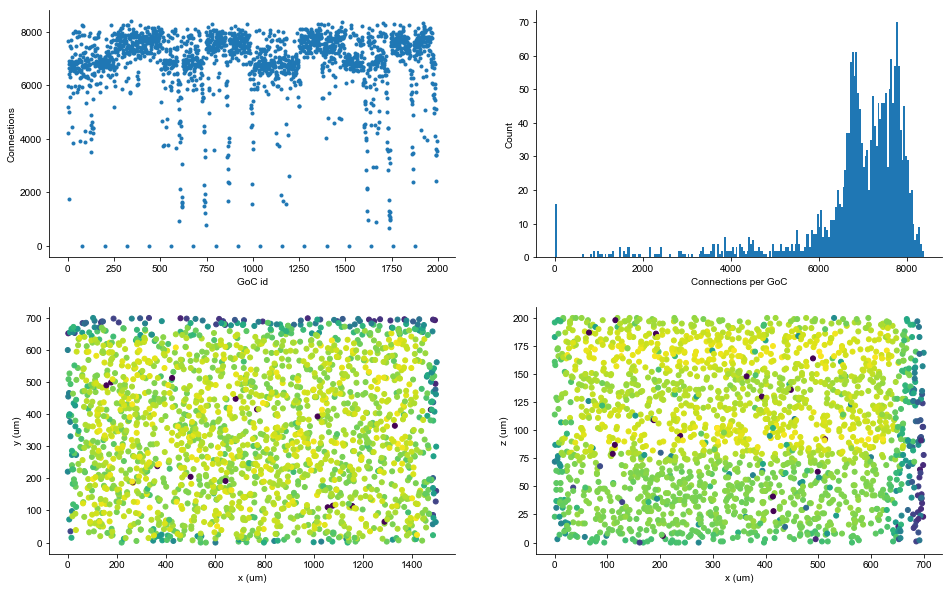

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))
ax[0,0].plot(cons_per_goc, '.')
ax[0,0].set(xlabel="GoC id", ylabel='Connections')
_ = ax[0,1].hist(cons_per_goc, 200)
ax[0,1].set(xlabel="Connections per GoC", ylabel='Count')
ax[1,0].scatter(gocxy[:,0], gocxy[:,1], 100, cons_per_goc, '.')
ax[1,0].set(xlabel="x (um)", ylabel="y (um)")
ax[1,1].scatter(gocxy[:,1], gocxy[:,2], 100, cons_per_goc, '.')
ax[1,1].set(xlabel="x (um)", ylabel="z (um)")

In [8]:
print("Connections per GoC = {} ± {}".format(np.mean(cons_per_goc), np.std(cons_per_goc)/np.sqrt(cons_per_goc.size)))

Connections per GoC = 6845.572932330827 ± 29.9543502455551


[Text(0,0.5,'z (um)'), Text(0.5,0,'x (um)')]

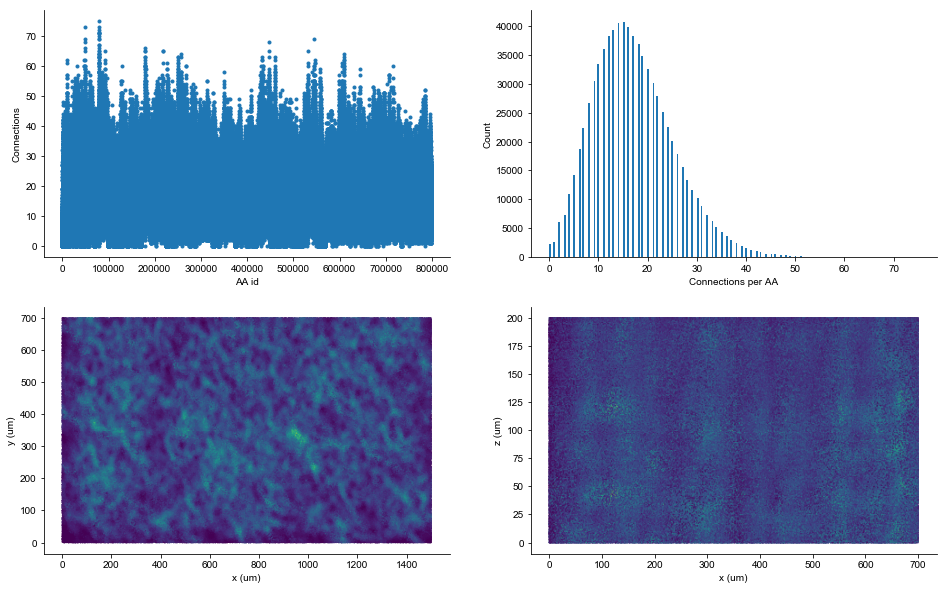

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))
ax[0,0].plot(cons_per_aa, '.')
ax[0,0].set(xlabel="AA id", ylabel='Connections')
ax[0,1].set(xlabel="Connections per AA", ylabel='Count')
_ = ax[0,1].hist(cons_per_aa, 200)
ax[1,0].scatter(grcxy[:,0], grcxy[:,1], 0.25, cons_per_aa, '.')
ax[1,0].set(xlabel="x (um)", ylabel="y (um)")
ax[1,1].scatter(grcxy[:,1], grcxy[:,2], 0.25, cons_per_aa, '.')
ax[1,1].set(xlabel="x (um)", ylabel="z (um)")

In [10]:
print("Connections per AA = {} ± {}".format(np.mean(cons_per_aa), np.std(cons_per_aa)/np.sqrt(cons_per_aa.size)))

Connections per AA = 17.11393233082707 ± 0.009195670721438755


## PyBREP with a corrected diameter

Here diameter = 15/sqrt(3) ~ 15/1.73 um.

In [11]:
output_path = Path('/Users/shhong/Documents/Ines/output_3')

# src = np.loadtxt(output_path / "AAtoGoCsources.dat")
# tgt = np.loadtxt(output_path / "AAtoGoCtargets.dat")
# src = src.astype(int)
# tgt = tgt.astype(int)

# np.save(output_path / 'AAtoGoCsources.npy', src)
# np.save(output_path / 'AAtoGoCtargets.npy', tgt)

srcs = np.load(output_path / 'AAtoGoCsources.npy')
tgts = np.load(output_path / 'AAtoGoCtargets.npy')

grcxy = np.loadtxt(output_path / 'GCcoordinates.sorted.dat')
gocxy = np.loadtxt(output_path / 'GoCcoordinates.sorted.dat')

df = dd.from_array(np.vstack((srcs, tgts)).T, columns=('src', 'tgt'))

cons_per_goc = df.groupby('tgt').count().compute()
cons_per_aa = df.groupby('src').count().compute()

cons_per_goc = convert_from_dd(cons_per_goc.src, gocxy.shape[0])
cons_per_aa = convert_from_dd(cons_per_aa.tgt, grcxy.shape[0])

[Text(0,0.5,'z (um)'), Text(0.5,0,'x (um)')]

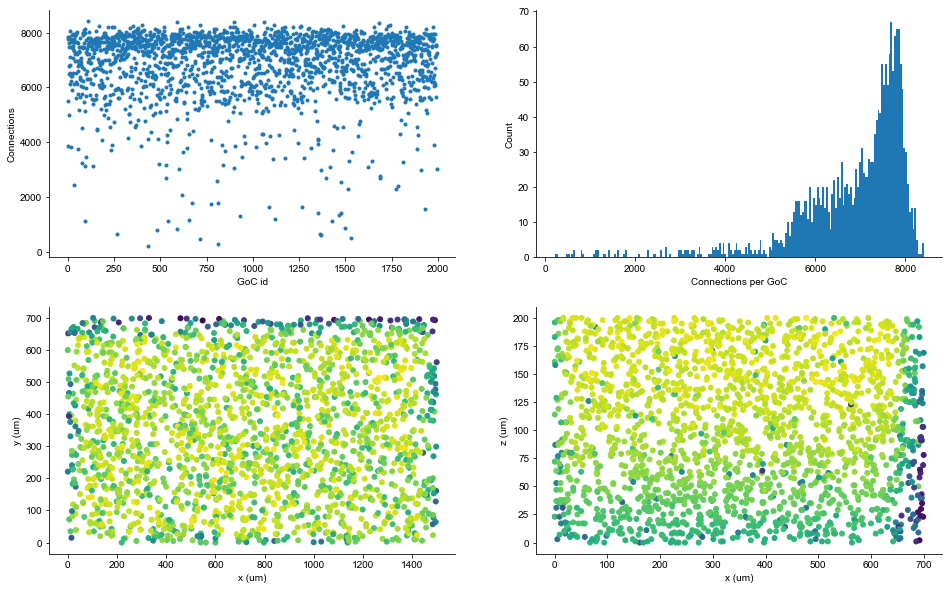

In [12]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))
ax[0,0].plot(cons_per_goc, '.')
ax[0,0].set(xlabel="GoC id", ylabel='Connections')
_ = ax[0,1].hist(cons_per_goc, 200)
ax[0,1].set(xlabel="Connections per GoC", ylabel='Count')
ax[1,0].scatter(gocxy[:,0], gocxy[:,1], 100, cons_per_goc, '.')
ax[1,0].set(xlabel="x (um)", ylabel="y (um)")
ax[1,1].scatter(gocxy[:,1], gocxy[:,2], 100, cons_per_goc, '.')
ax[1,1].set(xlabel="x (um)", ylabel="z (um)")

In [13]:
print("Connections per GoC = {} ± {}".format(np.mean(cons_per_goc), np.std(cons_per_goc)/np.sqrt(cons_per_goc.size)))

Connections per GoC = 6854.341353383458 ± 27.7153968916873


[Text(0,0.5,'z (um)'), Text(0.5,0,'x (um)')]

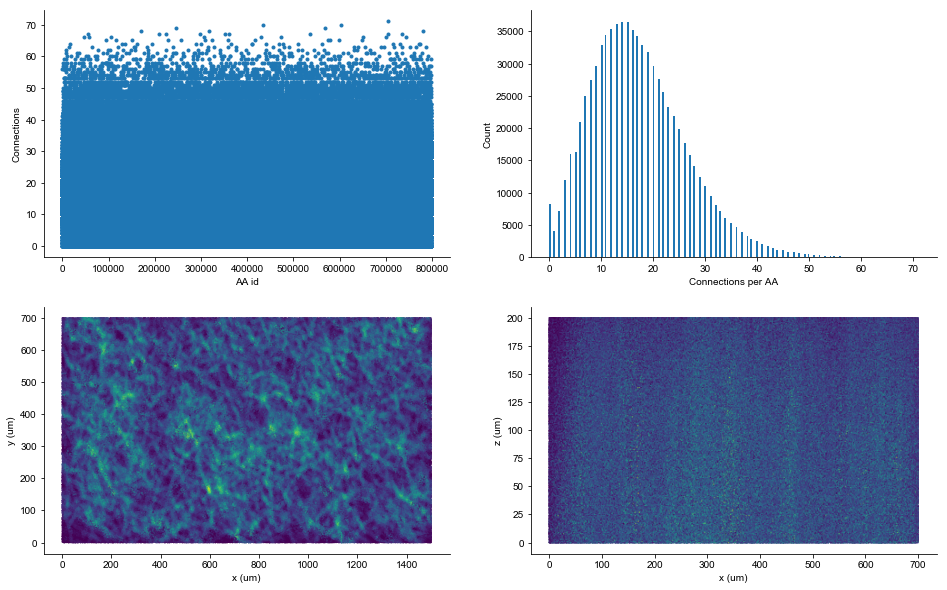

In [14]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))
ax[0,0].plot(cons_per_aa, '.')
ax[0,0].set(xlabel="AA id", ylabel='Connections')
ax[0,1].set(xlabel="Connections per AA", ylabel='Count')
_ = ax[0,1].hist(cons_per_aa, 200)
ax[1,0].scatter(grcxy[:,0], grcxy[:,1], 0.25, cons_per_aa, '.')
ax[1,0].set(xlabel="x (um)", ylabel="y (um)")
ax[1,1].scatter(grcxy[:,1], grcxy[:,2], 0.25, cons_per_aa, '.')
ax[1,1].set(xlabel="x (um)", ylabel="z (um)")

In [15]:
print("Connections per AA = {} ± {}".format(np.mean(cons_per_aa), np.std(cons_per_aa)/np.sqrt(cons_per_aa.size)))

Connections per AA = 17.135853383458645 ± 0.010239425359006333
